In [1]:
#Phase 1: Data Collection and Exploratory Data Analysis (EDA)
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,classification_report

In [3]:
#importing the data-set
data=pd.read_csv("D:\ML\ML Assignment\Food_Delivery_Time_Prediction.csv")
df=pd.DataFrame(data)
print(df)

    Order_ID       Customer_Location     Restaurant_Location  Distance  \
0    ORD0001  (17.030479, 79.743077)  (12.358515, 85.100083)      1.57   
1    ORD0002  (15.398319, 86.639122)  (14.174874, 77.025606)     21.32   
2    ORD0003  (15.687342, 83.888808)  (19.594748, 82.048482)      6.95   
3    ORD0004  (20.415599, 78.046984)  (16.915906, 78.278698)     13.79   
4    ORD0005  (14.786904, 78.706532)  (15.206038, 86.203182)      6.72   
..       ...                     ...                     ...       ...   
195  ORD0196   (17.910045, 81.56199)  (18.098924, 87.896124)     23.82   
196  ORD0197   (21.66459, 82.226635)  (16.892341, 80.554716)      6.09   
197  ORD0198   (14.575401, 82.55641)  (13.625369, 82.418092)     20.61   
198  ORD0199  (12.094497, 82.893369)  (19.135509, 86.659978)     24.06   
199  ORD0200  (19.360304, 84.132424)   (20.941636, 77.01334)      9.18   

    Weather_Conditions Traffic_Conditions  Delivery_Person_Experience  \
0                Rainy             Med

In [4]:
#Handle Missing Values
print(df.isnull().sum())
#checking for duplicated values
print("Number of duplicate rows:", df.duplicated().sum())

print(df[df['Distance'] <= 0])   # distance can't be zero or negative

Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64
Number of duplicate rows: 0
Empty DataFrame
Columns: [Order_ID, Customer_Location, Restaurant_Location, Distance, Weather_Conditions, Traffic_Conditions, Delivery_Person_Experience, Order_Priority, Order_Time, Vehicle_Type, Restaurant_Rating, Customer_Rating, Delivery_Time, Order_Cost, Tip_Amount]
Index: []


In [5]:
# Data Transformation

#Encode Categorical Variables:
df_encoded = pd.get_dummies(
    df, 
    columns=['Weather_Conditions', 'Traffic_Conditions', 'Vehicle_Type','Order_Priority', 'Order_Time'], 
    drop_first=True ,
    dtype=int 
)

print(df_encoded.columns)


# Normalize/Standardize Numeric Columns
scaler = StandardScaler()
df_encoded[['Distance', 'Delivery_Time', 'Order_Cost']] = scaler.fit_transform(df[['Distance', 'Delivery_Time', 'Order_Cost']])
print(df_encoded[['Distance', 'Delivery_Time', 'Order_Cost']])

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Delivery_Person_Experience', 'Restaurant_Rating', 'Customer_Rating',
       'Delivery_Time', 'Order_Cost', 'Tip_Amount', 'Weather_Conditions_Rainy',
       'Weather_Conditions_Snowy', 'Weather_Conditions_Sunny',
       'Traffic_Conditions_Low', 'Traffic_Conditions_Medium',
       'Vehicle_Type_Bike', 'Vehicle_Type_Car', 'Order_Priority_Low',
       'Order_Priority_Medium', 'Order_Time_Evening', 'Order_Time_Morning',
       'Order_Time_Night'],
      dtype='object')
     Distance  Delivery_Time  Order_Cost
0   -1.454738      -1.487932    0.501852
1    1.439192      -0.264987   -1.634294
2   -0.666417      -0.741529    1.092646
3    0.335835       1.382411   -0.923323
4   -0.700119      -1.280915   -0.779755
..        ...            ...         ...
195  1.805512      -0.675660    0.704997
196 -0.792431       0.673647    1.231298
197  1.335157       0.090908    0.566692
198  1.840679      -0.556356   -1.264

In [6]:
df_encoded.describe()

,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Traffic_Conditions_Low,Traffic_Conditions_Medium,Vehicle_Type_Bike,Vehicle_Type_Car,Order_Priority_Low,Order_Priority_Medium,Order_Time_Evening,Order_Time_Morning,Order_Time_Night
count,2.000000e+02,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000
mean,-1.643130e-16,5.250000,3.738500,3.686500,3.730349e-16,-2.042810e-16,46.616650,0.285000,0.240000,0.265000,0.405000,0.340000,0.345000,0.310000,0.375000,0.335000,0.285000,0.195000,0.22500
std,1.002509e+00,2.745027,0.703021,0.697063,1.002509e+00,1.002509e+00,29.361706,0.452547,0.428155,0.442441,0.492124,0.474898,0.476561,0.463654,0.485338,0.473175,0.452547,0.397195,0.41863
min,-1.608593e+00,1.000000,2.500000,2.600000,-1.857269e+00,-1.688954e+00,1.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,-7.924313e-01,3.000000,3.200000,3.100000,-7.896704e-01,-9.013569e-01,21.602500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,-1.806765e-01,5.000000,3.800000,3.700000,7.662482e-02,-1.925947e-02,47.530000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.325599e-01,8.000000,4.300000,4.300000,8.789834e-01,9.076026e-01,70.245000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000
max,1.963762e+00,10.000000,5.000000,5.000000,1.652608e+00,1.737826e+00,99.740000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [7]:
# Step 2 - Exploratory Data Analysis (EDA)
# Descriptive Statistics
# Calculate mean, median, mode, and variance

df_encoded.describe()

mean_values = df_encoded[['Distance', 'Delivery_Time', 'Order_Cost']].mean()
median_values = df_encoded[['Distance', 'Delivery_Time', 'Order_Cost']].median()
mode_values = df_encoded[['Distance', 'Delivery_Time', 'Order_Cost']].mode()
variance_values = df_encoded[['Distance', 'Delivery_Time', 'Order_Cost']].var()

print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nMode:\n", mode_values)
print("\nVariance:\n", variance_values)

Mean:
 Distance        -1.643130e-16
Delivery_Time    3.730349e-16
Order_Cost      -2.042810e-16
dtype: float64

Median:
 Distance        -0.180676
Delivery_Time    0.076625
Order_Cost      -0.019259
dtype: float64

Mode:
    Distance  Delivery_Time  Order_Cost
0 -1.491370      -0.122831    1.401256
1 -1.208571            NaN         NaN
2 -1.050321            NaN         NaN
3 -0.792431            NaN         NaN
4 -0.603410            NaN         NaN
5 -0.531611            NaN         NaN
6 -0.341125            NaN         NaN
7 -0.219506            NaN         NaN
8 -0.203388            NaN         NaN

Variance:
 Distance         1.005025
Delivery_Time    1.005025
Order_Cost       1.005025
dtype: float64


Delivery_Time                 1.000000
Order_Cost                   -0.009307
Delivery_Person_Experience   -0.019098
Customer_Rating              -0.021952
Tip_Amount                   -0.029154
Distance                     -0.075143
Restaurant_Rating            -0.091855
Name: Delivery_Time, dtype: float64


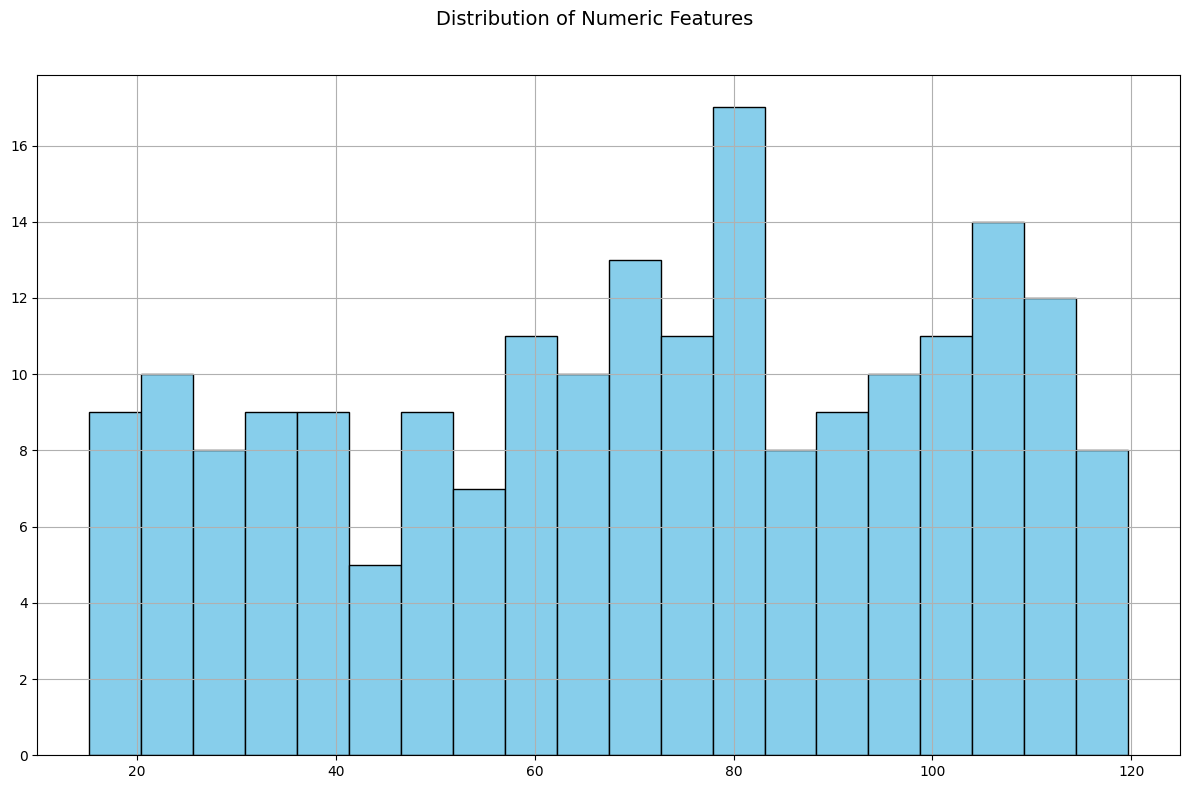

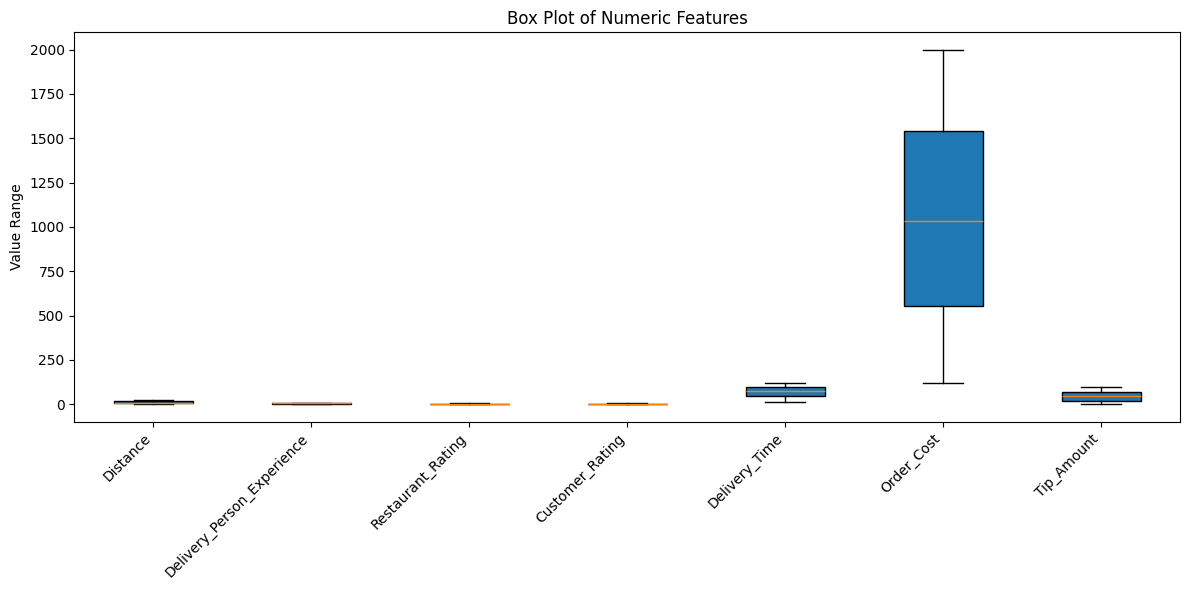

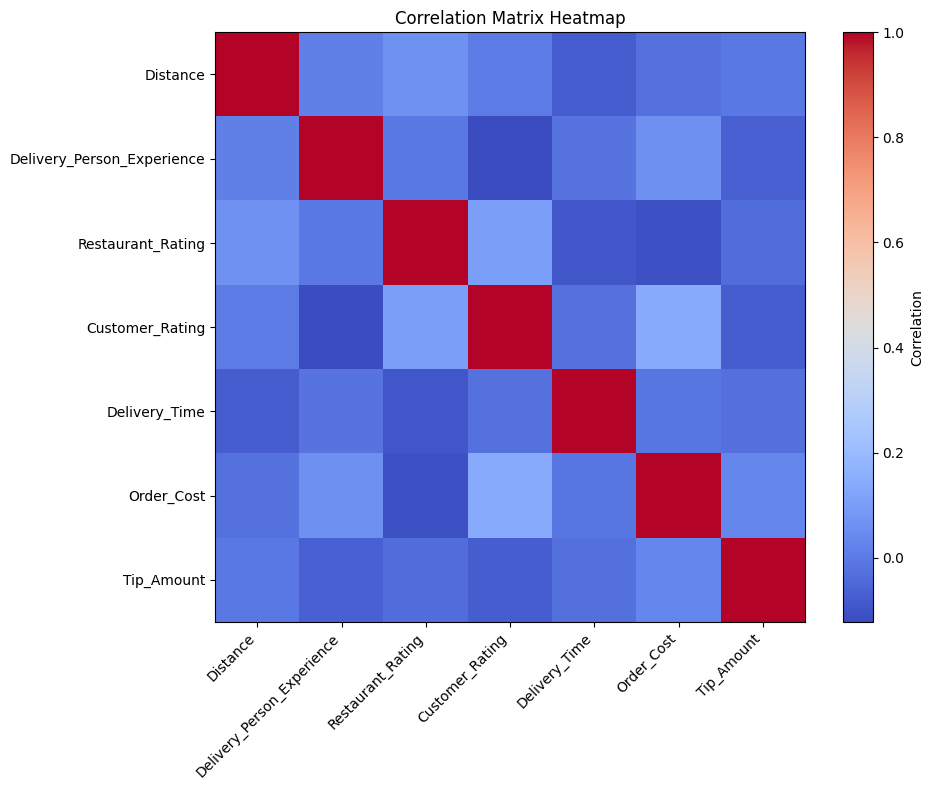

In [7]:
# Correlation Analysis
# Correlation matrix for all numeric columns
corr = df.select_dtypes(include=['number']).corr()



# Show correlations with target column 'Delivery_Time'
print(corr['Delivery_Time'].sort_values(ascending=False))

plt.figure(figsize=(12, 8))
df['Delivery_Time'].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- Box Plot for numeric features ---
numeric_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(12, 6))
plt.boxplot([df[col].dropna() for col in numeric_cols], patch_artist=True)
plt.xticks(range(1, len(numeric_cols) + 1), numeric_cols, rotation=45, ha='right')
plt.title("Box Plot of Numeric Features")
plt.ylabel("Value Range")
plt.tight_layout()
plt.show()

# --- Correlation Matrix (Heatmap) ---
corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()


In [9]:

# Columns to check for outliers
numeric_columns = ['Distance', 'Delivery_Time', 'Order_Cost']
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col} Outliers:\n", outliers)


    df = df[~((df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR))]




Distance Outliers:
 Empty DataFrame
Columns: [Order_ID, Customer_Location, Restaurant_Location, Distance, Weather_Conditions, Traffic_Conditions, Delivery_Person_Experience, Order_Priority, Order_Time, Vehicle_Type, Restaurant_Rating, Customer_Rating, Delivery_Time, Order_Cost, Tip_Amount]
Index: []
Delivery_Time Outliers:
 Empty DataFrame
Columns: [Order_ID, Customer_Location, Restaurant_Location, Distance, Weather_Conditions, Traffic_Conditions, Delivery_Person_Experience, Order_Priority, Order_Time, Vehicle_Type, Restaurant_Rating, Customer_Rating, Delivery_Time, Order_Cost, Tip_Amount]
Index: []
Order_Cost Outliers:
 Empty DataFrame
Columns: [Order_ID, Customer_Location, Restaurant_Location, Distance, Weather_Conditions, Traffic_Conditions, Delivery_Person_Experience, Order_Priority, Order_Time, Vehicle_Type, Restaurant_Rating, Customer_Rating, Delivery_Time, Order_Cost, Tip_Amount]
Index: []


In [10]:
# Step 3 - Feature Engineering
print(df_encoded["Order_Time_Evening"])
print(df_encoded.columns)
df_encoded['Rush_Hour'] = np.where(
    (df_encoded['Order_Time_Morning'] == 1) | (df_encoded['Order_Time_Evening'] == 1),
    'Rush_Hour',
    'Non_Rush_Hour'
)
print(df_encoded["Rush_Hour"])




0      0
1      0
2      0
3      1
4      0
      ..
195    0
196    0
197    0
198    0
199    0
Name: Order_Time_Evening, Length: 200, dtype: int64
Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Delivery_Person_Experience', 'Restaurant_Rating', 'Customer_Rating',
       'Delivery_Time', 'Order_Cost', 'Tip_Amount', 'Weather_Conditions_Rainy',
       'Weather_Conditions_Snowy', 'Weather_Conditions_Sunny',
       'Traffic_Conditions_Low', 'Traffic_Conditions_Medium',
       'Vehicle_Type_Bike', 'Vehicle_Type_Car', 'Order_Priority_Low',
       'Order_Priority_Medium', 'Order_Time_Evening', 'Order_Time_Morning',
       'Order_Time_Night'],
      dtype='object')
0      Non_Rush_Hour
1      Non_Rush_Hour
2      Non_Rush_Hour
3          Rush_Hour
4      Non_Rush_Hour
           ...      
195    Non_Rush_Hour
196    Non_Rush_Hour
197    Non_Rush_Hour
198    Non_Rush_Hour
199        Rush_Hour
Name: Rush_Hour, Length: 200, dtype: object


In [13]:
# Train-Test Split
print(df_encoded.columns)
x=df_encoded[["Distance","Traffic_Conditions_Low","Traffic_Conditions_Medium","Order_Priority_Low","Order_Priority_Medium","Weather_Conditions_Rainy","Delivery_Person_Experience"]]
y=df_encoded["Delivery_Time"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)
pred=linear_model.predict(x_test_scaled)
print(r2_score(y_test,pred))
print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test,pred))


Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Delivery_Person_Experience', 'Restaurant_Rating', 'Customer_Rating',
       'Delivery_Time', 'Order_Cost', 'Tip_Amount', 'Weather_Conditions_Rainy',
       'Weather_Conditions_Snowy', 'Weather_Conditions_Sunny',
       'Traffic_Conditions_Low', 'Traffic_Conditions_Medium',
       'Vehicle_Type_Bike', 'Vehicle_Type_Car', 'Order_Priority_Low',
       'Order_Priority_Medium', 'Order_Time_Evening', 'Order_Time_Morning',
       'Order_Time_Night', 'Rush_Hour'],
      dtype='object')
-0.17119648045628333
0.9142994201076183
1.2234060009644991


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:



mean=df_encoded['Delivery_Time'].mean()
print(mean)
df_encoded['Delivery_Status'] = df_encoded['Delivery_Time'].apply(lambda x: 'Fast' if x <= mean else 'Delayed')

df_encoded = pd.get_dummies(
    df, 
    columns=['Weather_Conditions', 'Traffic_Conditions', 'Vehicle_Type','Order_Priority', 'Order_Time'], 
    drop_first=True ,
    dtype=int 
)
print(df_encoded.head()) 
df_encoded.drop(['Delivery_Time', 'Order_ID'], axis=1)
print(df_encoded.columns)

x = df_encoded[['Delivery_Person_Experience', 'Distance',
                'Traffic_Conditions_Low', 'Traffic_Conditions_Medium',
                'Weather_Conditions_Rainy', 'Weather_Conditions_Snowy', 'Weather_Conditions_Sunny']]
y=df_encoded['Delivery_Status']




70.49494999999999
  Order_ID       Customer_Location     Restaurant_Location  Distance  \
0  ORD0001  (17.030479, 79.743077)  (12.358515, 85.100083)      1.57   
1  ORD0002  (15.398319, 86.639122)  (14.174874, 77.025606)     21.32   
2  ORD0003  (15.687342, 83.888808)  (19.594748, 82.048482)      6.95   
3  ORD0004  (20.415599, 78.046984)  (16.915906, 78.278698)     13.79   
4  ORD0005  (14.786904, 78.706532)  (15.206038, 86.203182)      6.72   

   Delivery_Person_Experience  Restaurant_Rating  Customer_Rating  \
0                           4                4.1              3.0   
1                           8                4.5              4.2   
2                           9                3.3              3.4   
3                           2                3.2              3.7   
4                           6                3.5              2.8   

   Delivery_Time  Order_Cost  Tip_Amount  ... Weather_Conditions_Sunny  \
0          26.22     1321.10       81.54  ...               

In [ ]:
print(df_encoded.columns)
a=df_encoded[["Distance","Traffic_Conditions_Low","Traffic_Conditions_Medium","Weather_Conditions_Rainy","Weather_Conditions_Snowy","Weather_Conditions_Sunny"
              ,"Delivery_Person_Experience"]]
b=df_encoded["Delivery_Status"]



print(df_encoded["Delivery_Status"])

X_train, X_test, Y_train, Y_test = train_test_split(a,b, test_size=0.2, random_state=42)
print(Y_train.unique())
print(Y_train.dtype)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


# Train model
model = LogisticRegression()
model.fit(X_train, Y_train)
# Predictions
Y_pred = model.predict(X_test)

acruracy=accuracy_score(Y_test,Y_pred)
precision=precision_score(Y_test,Y_pred,pos_label='Delayed')
recall = recall_score(Y_test, Y_pred, pos_label='Delayed')
f1 = f1_score(Y_test, Y_pred, pos_label='Delayed')


print("accurancy")
print(acruracy)
print("precision")
print(precision)
print("recall")
print(recall)
print("f1_score")
print(f1)

print("classification report")
print(classification_report(Y_test,Y_pred))



Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Delivery_Person_Experience', 'Restaurant_Rating', 'Customer_Rating',
       'Delivery_Time', 'Order_Cost', 'Tip_Amount', 'Delivery_Status',
       'Weather_Conditions_Rainy', 'Weather_Conditions_Snowy',
       'Weather_Conditions_Sunny', 'Traffic_Conditions_Low',
       'Traffic_Conditions_Medium', 'Vehicle_Type_Bike', 'Vehicle_Type_Car',
       'Order_Priority_Low', 'Order_Priority_Medium', 'Order_Time_Evening',
       'Order_Time_Morning', 'Order_Time_Night', 'Rush_Hour'],
      dtype='object')
0         Fast
1         Fast
2         Fast
3      Delayed
4         Fast
        ...   
195       Fast
196    Delayed
197    Delayed
198       Fast
199    Delayed
Name: Delivery_Status, Length: 200, dtype: object
['Fast' 'Delayed']
object
accurancy
0.425
precision
0.48
recall
0.5454545454545454
f1_score
0.5106382978723404
classification report
              precision    recall  f1-score   support

     Delayed

In [ ]:
print(x_train.shape)
print(x_test.shape)


(160, 7)
(40, 7)


🔹 Linear Regression Accuracy: 0.45
🔹 Logistic Regression Accuracy: 0.425

Confusion Matrix (Linear Regression):
 [[ 0 22]
 [ 0 18]]

Confusion Matrix (Logistic Regression):
 [[12 10]
 [13  5]]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


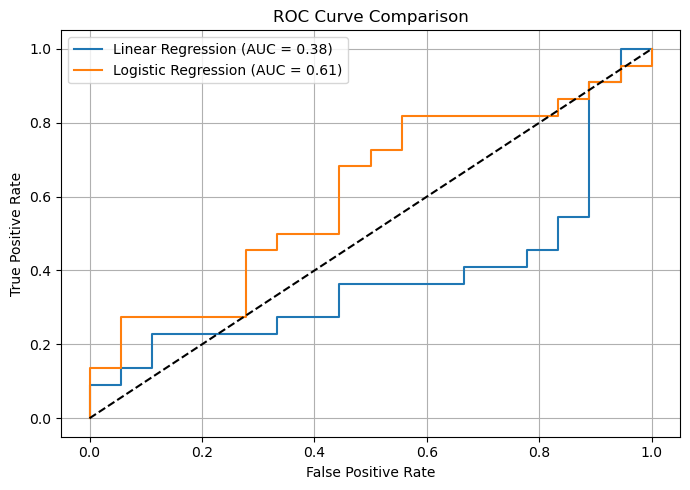

In [ ]:
# --- Final Phase: Model Evaluation and Comparison ---
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# --- Linear Regression Predictions ---
y_pred_lin = linear_model.predict(x_test)
y_pred_lin_binary = ["Fast" if y > 0.5 else "delayed" for y in y_pred_lin]

# --- Logistic Regression Predictions ---
# Make sure X_test columns align with model features
X_test = X_test.reindex(columns=model.feature_names_in_, fill_value=0)

y_pred_log = model.predict(X_test)
y_pred_prob_log = model.predict_proba(X_test)[:, 1]

# --- Accuracy ---
acc_lin = accuracy_score(Y_test, y_pred_lin_binary)
acc_log = accuracy_score(Y_test, y_pred_log)

print("🔹 Linear Regression Accuracy:", round(acc_lin, 3))
print("🔹 Logistic Regression Accuracy:", round(acc_log, 3))

# --- Confusion Matrices ---
cm_lin = confusion_matrix(Y_test, y_pred_lin_binary)
cm_log = confusion_matrix(Y_test, y_pred_log)

print("\nConfusion Matrix (Linear Regression):\n", cm_lin)
print("\nConfusion Matrix (Logistic Regression):\n", cm_log)

# --- ROC Curve ---
fpr_lin, tpr_lin, _ = roc_curve(Y_test, y_pred_lin, pos_label="Delayed")
fpr_log, tpr_log, _ = roc_curve(Y_test, y_pred_prob_log, pos_label="Delayed")

roc_auc_lin = auc(fpr_lin, tpr_lin)
roc_auc_log = auc(fpr_log, tpr_log)

# --- Plot ROC Curves ---
plt.figure(figsize=(7,5))
plt.plot(fpr_lin, tpr_lin, label=f'Linear Regression (AUC = {roc_auc_lin:.2f})')
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Based on the model predictions, several operational improvements can be implemented to optimize food delivery performance.

Optimizing Delivery Routes:
The models show that delivery time is strongly influenced by distance and traffic conditions. Therefore, route optimization should be prioritized. Using real-time traffic data and shortest-path algorithms can help delivery personnel avoid congested areas and reduce travel time.

Adjusting Staffing During High-Traffic Periods:
Logistic regression results indicate that delays are more frequent during rush hours or under poor weather conditions. Companies can use predictive insights to increase the number of available delivery personnel during these periods, ensuring faster service and better resource allocation.

Providing Better Training to Delivery Staff:
The data suggests that delivery personnel with more experience tend to deliver faster. Hence, conducting regular training programs focused on route planning, time management, and safety can enhance the efficiency of less experienced drivers and improve overall delivery performance.

Proactive Customer Communication:
When the model predicts a high probability of delay, customers can be notified in advance with revised delivery times. This improves customer satisfaction and trust, even when delays occur.